<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/P2_JS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 2**

## **Langkah 1**

In [1]:
# ==========================================
# IMPORT LIBRARY
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Fungsi untuk memvisualisasikan decision boundary SVM"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X_grid = np.meshgrid(y, x)
    xy = np.vstack([X_grid.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X_grid.shape)

    # Plot batas dan margin
    ax.contour(X_grid, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def plot_3D(elev=30, azim=30, X=None, y=None, r=None):
    """Fungsi untuk visualisasi 3D"""
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

## **Data Linear & Non Linear Kerel**

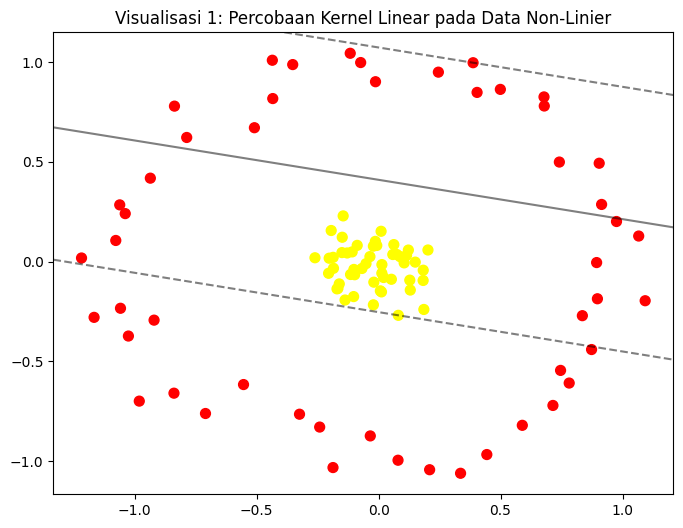

In [3]:
# Membuat data lingkaran (concentric circles)
X, y = make_circles(100, factor=.1, noise=.1)

# Mencoba fitting dengan Linear Kernel (Pasti Gagal)
clf_linear = SVC(kernel='linear').fit(X, y)

# Visualisasi 1: Kegagalan Linear Kernel
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf_linear, plot_support=False)
plt.title("Visualisasi 1: Percobaan Kernel Linear pada Data Non-Linier")
plt.show()

Model SVM dengan kernel='linear' mencoba memisahkan data menggunakan garis lurus. Namun, garis lurus tidak mungkin memisahkan lingkaran dalam (kuning) dan lingkaran luar (merah) tanpa memotong salah satunya. Akibatnya, performa model ini sangat buruk karena tidak ada hyperplane linier yang valid untuk distribusi data seperti ini.

## **Langkah 2: Visualisasi Proyeksi 3D (Kernel Trick)**

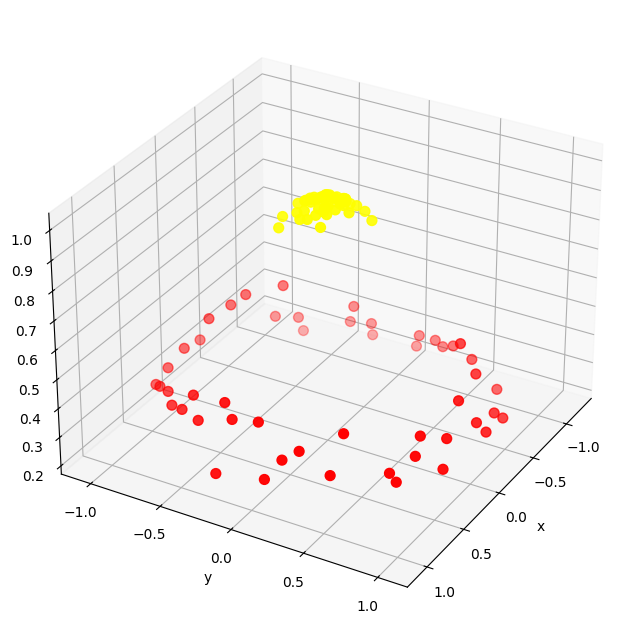

Visualisasi 2: Data diproyeksikan ke dimensi ke-3 (Z-axis)


In [4]:
# Menghitung dimensi tambahan r (radial distance)
r = np.exp(-(X**2).sum(1))

# Visualisasi 2: Proyeksi Data ke 3D
# Menampilkan plot statis (tanpa interact) untuk kompatibilitas
plt.figure(figsize=(10, 8))
plot_3D(elev=30, azim=30, X=X, y=y, r=r)
print("Visualisasi 2: Data diproyeksikan ke dimensi ke-3 (Z-axis)")

* Data yang berada di tengah (dekat titik 0,0) memiliki nilai $r$ mendekati 1 (warna kuning naik ke atas).
* Data yang berada di pinggir (lingkaran luar) memiliki nilai $r$ mendekati 0 (warna merah tetap di bawah).
* Dalam ruang 3D ini, kedua kelas data tersebut kini dapat dipisahkan dengan mudah menggunakan sebuah bidang datar (linear plane) horizontal yang memotong di antara elevasi kuning dan merah. Inilah inti dari Kernel Trick: memetakan data ke dimensi lebih tinggi agar menjadi linearly separable.

## **LANGKAH 3: Fitting Dengan RBF Kernel**

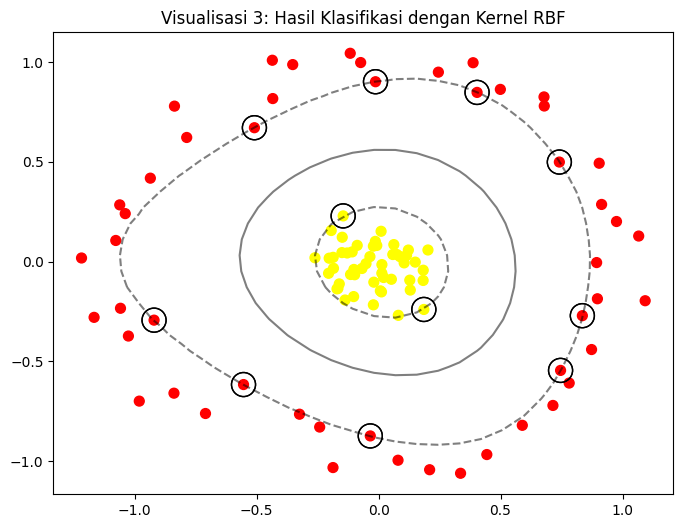

In [5]:
clf_rbf = SVC(kernel='rbf', C=1E6)
clf_rbf.fit(X, y)

# Visualisasi 3: Hasil Akhir dengan RBF Kernel
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf_rbf)
plt.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none', edgecolors='k')
plt.title("Visualisasi 3: Hasil Klasifikasi dengan Kernel RBF")
plt.show()

* Garis pemisah (decision boundary) tidak lagi berbentuk garis lurus, melainkan berbentuk lingkaran tertutup yang mengelilingi data kelas kuning.

* Model berhasil memisahkan data lingkaran dalam dan luar dengan sempurna.

* Kernel RBF secara matematis melakukan proses yang serupa dengan visualisasi 3D sebelumnya (pemetaan ke dimensi tak hingga), lalu memproyeksikan kembali batas pemisahnya ke dalam bentuk 2D.